# PANDAS

In [2]:
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline 

### Series
  - pandas의 기본 객체 중 하나
  - numpy의 ndarray를 기반으로 인덱싱을 기능을 추가하여 1차원 배열을 나타냄
  - index를 지정하지 않을 시, 기본적으로 ndarray와 같이 0-based 인덱스 생성, 지정할 경우 명시적으로 지정된 index를 사용
  - 같은 타입의 0개 이상의 데이터를 가질 수 있음

In [3]:
s = pd.Series(['a','b','c'])
s

0    a
1    b
2    c
dtype: object

In [4]:
s = pd.Series(np.arange(0,100)) 
s.tail()

95    95
96    96
97    97
98    98
99    99
dtype: int32

In [5]:
# pd.Series(data, index)

s = pd.Series(["he","she","they"],[1,2,3])
print(s,"\n")
print(s.index,"\n")
print(s.values,"\n")
print(s[2],"\n")
print(s[[2, 3]],"\n")

1      he
2     she
3    they
dtype: object 

Int64Index([1, 2, 3], dtype='int64') 

['he' 'she' 'they'] 

she 

2     she
3    they
dtype: object 



### **Series의 함수들**
 - size : 개수 반환
 - shape : 튜플형태로 shape반환
 - unique: 유일한 값만 ndarray로 반환
 - count : NaN을 제외한 개수를 반환
 - mean: NaN을 제외한 평균 
 - value_counts: NaN을 제외하고 각 값들의 빈도를 반환 

In [6]:
s = pd.Series([2,3,1,5,3,2,23,np.NaN])

print(s,"\n")
print(s.size,"\n")
print(s.shape,"\n")
print(s.unique(),"\n")
print(s.count(),"\n")
print(s.mean(),"\n")

0     2.0
1     3.0
2     1.0
3     5.0
4     3.0
5     2.0
6    23.0
7     NaN
dtype: float64 

8 

(8,) 

[ 2.  3.  1.  5. 23. nan] 

7 

5.571428571428571 



In [7]:
s1 = pd.Series([1,2,3],['a','b','c'])
s2 = pd.Series([4,21,5],['c','b','a'])
print(s1 + s2, "\n") ##같은 인덱스끼리 연산
print(s1 ** 2, "\n")
print(s1 >= 2, "\n")
print(s1[s1 >= 2], "\n")

a     6
b    23
c     7
dtype: int64 

a    1
b    4
c    9
dtype: int64 

a    False
b     True
c     True
dtype: bool 

b    2
c    3
dtype: int64 



In [8]:
s = pd.Series([10,20,30,40])

s.drop(2)   # s 자체에서 지워진건 아님
print(s, "\n")

s.drop(2, inplace=True) # 객체 자체에 변화를 줌
print(s)

0    10
1    20
2    30
3    40
dtype: int64 

0    10
1    20
3    40
dtype: int64


### DataFrame
  - Series가 1차원이라면 DataFrame은 2차원으로 확대된 버젼
  - Excel spreadsheet이라고 생각하면 이해하기 쉬움
  - 2차원이기 때문에 인덱스가 row, column로 구성됨
   - row는 각 개별 데이터를, column은 개별 속성을 의미

### DataFrame 생성하기

In [9]:
data = {'a' : [100, '이백', 300], 'b': [1, 'a', 3], 'c': [4, 5, 6]}
pd.DataFrame(data, index=[0,1,2])

,a,b,c
0,100,1,4
1,이백,a,5
2,300,3,6


In [10]:
a = pd.Series([100, 200, 300], ['a', 'b', 'c'])
b = pd.Series([101, 202, 303], ['a', 'b', 'c'])
c = pd.Series([110, 220, 330], ['a', 'b', 'c'])

pd.DataFrame([a, b, c])

,a,b,c
0,100,200,300
1,101,202,303
2,110,220,330


### CSV에서 가져오기

In [11]:
train_data = pd.read_csv('./train.csv')

In [12]:
train_data.head(n=3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


### dataframe 데이터 파악하기
 - shape 속성 (row, column)
 - describe 함수 - 숫자형 데이터의 통계치 계산
 - info 함수 - 데이터 타입, 각 아이템의 개수 등 출력

In [13]:
train_data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [14]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [15]:
train_data.shape

(891, 12)

In [16]:
train_data.index

RangeIndex(start=0, stop=891, step=1)

In [17]:
train_data.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

### col 선택하기
#### - 하나의 컬럼 선택하기

    - df[ '컬럼명' ] --> df의 해당 col을 가져온다 .... series 형태로 저장
#### - 복수의 컬럼 선택하기

    - df[ [ '컬럼명1', '컬럼명2', '컬럼명3' ] ] --> 여러개의 col을 가져온다 ...... data frame 형태로 저장

    -df[ [ '컬럼명' ] ] --> 이렇게 하나만 가져오는것도 가능..... data frame 형태로 저장

    - 이때는 df[ ] 안에 col이름 리스트를 집어넣는다고 생각하기

In [18]:
train_data['Fare'].head(n=2)  ## series

0     7.2500
1    71.2833
Name: Fare, dtype: float64

In [19]:
train_data[['Fare']].head(n=2)  ## dataframe

,Fare
0,7.2500
1,71.2833


In [20]:
train_data[['Fare', 'Survived']].head(n=2)  ## dataframe

,Fare,Survived
0,7.2500,0
1,71.2833,1


In [21]:
train_data[['Fare', 'Survived']][3:5] ## slicing은 row레벨

,Fare,Survived
3,53.10,1
4,8.05,0


### row 선택하기
- **.loc, .iloc함수**로 row 선택 가능
   - loc - 인덱스 자체를 사용
   - iloc - 0 based index로 사용
   - 이 두 함수는 ,를 사용하여 column 선택도 가능

In [22]:
train_data.loc[15]

PassengerId                                  16
Survived                                      1
Pclass                                        2
Name           Hewlett, Mrs. (Mary D Kingcome) 
Sex                                      female
Age                                          55
SibSp                                         0
Parch                                         0
Ticket                                   248706
Fare                                         16
Cabin                                       NaN
Embarked                                      S
Name: 15, dtype: object

In [23]:
train_data.loc[ [5, 21] ]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
21,22,1,2,"Beesley, Mr. Lawrence",male,34.0,0,0,248698,13.0000,D56,S


In [24]:
train_data.loc[ [5, 21], ['Survived', 'Age', 'Pclass'] ]

,Survived,Age,Pclass
5,0,NaN,3
21,1,34.0,2


In [25]:
train_data[['Survived', 'Age', 'Pclass']].loc[[5,21]] 

,Survived,Age,Pclass
5,0,NaN,3
21,1,34.0,2


In [26]:
train_data['Age_double']= train_data['Age'] * 2
train_data[['Age', 'Age_double']].head(3)

,Age,Age_double
0,22.0,44.0
1,38.0,76.0
2,26.0,52.0


#### df.insert(넣을 col idx, 새 col명, data)

In [27]:
train_data.insert(3, 'nick_name', list(map(lambda x:x[0] , train_data['Name'])))
train_data.iloc[[10,13], [2,3,4]]

,Pclass,nick_name,Name
10,3,S,"Sandstrom, Miss. Marguerite Rut"
13,3,A,"Andersson, Mr. Anders Johan"


### 열 지우기
#### df.drop([ col명 ], axis=1, inplace=True)  --> 실제로도 지워짐

In [28]:
train_data.drop(['nick_name'], axis=1, inplace=True)
train_data.iloc[[10,13], [2,3,4]]

,Pclass,Name,Sex
10,3,"Sandstrom, Miss. Marguerite Rut",female
13,3,"Andersson, Mr. Anders Johan",male


### 행 지우기
#### df.drop([ row명], axis=0)  --> 실제로는 안지워짐

In [29]:
train_data.drop([1], axis=0).head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_double
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.250,NaN,S,44.0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.925,NaN,S,52.0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.100,C123,S,70.0


#### 변수(column) 사이의 상관계수(correlation) 
 - corr함수를 통해 상관계수 연산 (-1, 1 사이의 결과)
   - 연속성(숫자형)데이터에 대해서만 연산
   - 인과관계를 의미하진 않음
 - 1 -> 양의 상관관계
 - -1 -> 음의 상관관계
 - 0 -> 아무 상관 없음

In [30]:
train_data.corr()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Age_double
PassengerId,1.000000,-0.005007,-0.035144,0.036847,-0.057527,-0.001652,0.012658,0.036847
Survived,-0.005007,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307,-0.077221
Pclass,-0.035144,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500,-0.369226
Age,0.036847,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067,1.000000
SibSp,-0.057527,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651,-0.308247
Parch,-0.001652,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225,-0.189119
Fare,0.012658,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000,0.096067
Age_double,0.036847,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067,1.000000


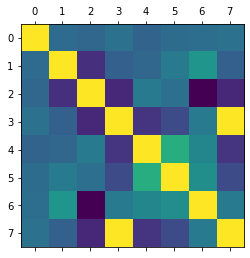

In [31]:
plt.matshow(train_data.corr())

### NaN 처리하기
#### NaN 값 확인
 - info함수를 통하여 개수 확인
 - isna함수를 통해 boolean 타입으로 확인

In [32]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
 12  Age_double   714 non-null    float64
dtypes: float64(3), int64(5), object(5)
memory usage: 90.6+ KB


In [33]:
train_data.isna().tail(6)
# true -> NaN

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_double
885,False,False,False,False,False,False,False,False,False,False,True,False,False
886,False,False,False,False,False,False,False,False,False,False,True,False,False
887,False,False,False,False,False,False,False,False,False,False,False,False,False
888,False,False,False,False,False,True,False,False,False,False,True,False,True
889,False,False,False,False,False,False,False,False,False,False,False,False,False
890,False,False,False,False,False,False,False,False,False,False,True,False,False


In [34]:
train_data['Age'].isna().head(2)

0    False
1    False
Name: Age, dtype: bool

#### NaN 처리 방법
 - 데이터에서 삭제
   - dropna 함수 
 - 다른 값으로 치환
   - fillna 함수

In [35]:
train_data.dropna()[['Sex', 'Age']].tail(3) ## 실제 반영은 안됨

,Sex,Age
879,female,56.0
887,female,19.0
889,male,26.0


In [36]:
train_data.dropna(subset=['Age'])[['Sex', 'Age']].tail(3)
# Age열에 NaN 있는 행 삭제

,Sex,Age
887,female,19.0
889,male,26.0
890,male,32.0


In [37]:
train_data.dropna(axis=1).drop(['Name'], axis=1).head(3)
# NaN이 하나라도 있는 열은 모두 삭제하고, 
# 'Name' 열 제외한 모든 열 출력

,PassengerId,Survived,Pclass,Sex,SibSp,Parch,Ticket,Fare
0,1,0,3,male,1,0,A/5 21171,7.2500
1,2,1,1,female,1,0,PC 17599,71.2833
2,3,1,3,female,0,0,STON/O2. 3101282,7.9250


In [38]:
mean_age = train_data['Age'].mean()
print(mean_age,"\n")
train_data['Age'].fillna(mean_age).tail(4)

## Age열의 NaN을 Age전체 평균으로 채워준다

29.69911764705882 



887    19.000000
888    29.699118
889    26.000000
890    32.000000
Name: Age, dtype: float64

In [39]:
# 사망자 나이 평균
dead_mean = train_data[train_data['Survived'] == 0]['Age'].mean()
dead_mean

30.62617924528302

In [40]:
# 사망자중 나이가 NaN인 것들 dead_mean으로 채우기
train_data[train_data['Survived'] == 0]['Age'].fillna(dead_mean).tail(3)

886    27.000000
888    30.626179
890    32.000000
Name: Age, dtype: float64

#### age를 10대, 20대 .... 로 범주화시킴

In [41]:
def age_categorize(age):
    if math.isnan(age):
        return -1
    return math.floor(age/10)*10

train_data['Age'].apply(age_categorize).head()

0    20
1    30
2    20
3    30
4    30
Name: Age, dtype: int64

#### One-hot encoding
 - 범주형 데이터는 분석단계에서 계산이 어렵기 때문에 숫자형으로 변경이 필요함
 - 범주형 데이터의 각 범주(category)를 column레벨로 변경
 - 해당 범주에 해당하면 1, 아니면 0으로 채우는 인코딩 기법
 - pandas.get_dummies 함수 사용
   - drop_first : 첫번째 카테고리 값은 사용하지 않음

In [42]:
a = pd.get_dummies(train_data, columns=['Sex'])
a.drop(['Name', 'Ticket', 'Fare', 'PassengerId'], axis=1).head(3)

,Survived,Pclass,Age,SibSp,Parch,Cabin,Embarked,Age_double,Sex_female,Sex_male
0,0,3,22.0,1,0,NaN,S,44.0,0,1
1,1,1,38.0,1,0,C85,C,76.0,1,0
2,1,3,26.0,0,0,NaN,S,52.0,1,0


In [43]:
a = pd.get_dummies(train_data, columns=['Sex'], drop_first=True)
a.drop(['Name', 'Ticket', 'Fare', 'PassengerId'], axis=1).head(3)

# drop_first=True -> 2가지 범주를 1개의 열로 표현

,Survived,Pclass,Age,SibSp,Parch,Cabin,Embarked,Age_double,Sex_male
0,0,3,22.0,1,0,NaN,S,44.0,1
1,1,1,38.0,1,0,C85,C,76.0,0
2,1,3,26.0,0,0,NaN,S,52.0,0


#### group by
  + 아래의 세 단계를 적용하여 데이터를 그룹화(groupping) (SQL의 group by 와 개념적으로는 동일, 사용법은 유사)
    - 데이터 분할
    - operation 적용
    - 데이터 병합

In [44]:
sex_group = train_data.groupby('Sex') ## sex_group은 객체
sex_group.groups

{'female': [1, 2, 3, 8, 9, 10, 11, 14, 15, 18, 19, 22, 24, 25, 28, 31, 32, 38, 39, 40, 41, 43, 44, 47, 49, 52, 53, 56, 58, 61, 66, 68, 71, 79, 82, 84, 85, 88, 98, 100, 106, 109, 111, 113, 114, 119, 123, 128, 132, 133, 136, 140, 141, 142, 147, 151, 156, 161, 166, 167, 172, 177, 180, 184, 186, 190, 192, 194, 195, 198, 199, 205, 208, 211, 215, 216, 218, 229, 230, 233, 235, 237, 240, 241, 246, 247, 251, 254, 255, 256, 257, 258, 259, 264, 268, 269, 272, 274, 275, 276, ...], 'male': [0, 4, 5, 6, 7, 12, 13, 16, 17, 20, 21, 23, 26, 27, 29, 30, 33, 34, 35, 36, 37, 42, 45, 46, 48, 50, 51, 54, 55, 57, 59, 60, 62, 63, 64, 65, 67, 69, 70, 72, 73, 74, 75, 76, 77, 78, 80, 81, 83, 86, 87, 89, 90, 91, 92, 93, 94, 95, 96, 97, 99, 101, 102, 103, 104, 105, 107, 108, 110, 112, 115, 116, 117, 118, 120, 121, 122, 124, 125, 126, 127, 129, 130, 131, 134, 135, 137, 138, 139, 143, 144, 145, 146, 148, 149, 150, 152, 153, 154, 155, ...]}

#### groupping 함수
 - 그룹 데이터에 적용 가능한 통계 함수(NaN은 제외하여 연산)
 - count - 데이터 개수 
 - sum   - 데이터의 합
 - mean, std, var - 평균, 표준편차, 분산
 - min, max - 최소, 최대값

In [45]:
sex_group.count()

,PassengerId,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_double
Sex,,,,,,,,,,,,
female,314,314,314,314,261,314,314,314,314,97,312,261
male,577,577,577,577,453,577,577,577,577,107,577,453


In [46]:
sex_group.mean()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Age_double
Sex,,,,,,,,
female,431.028662,0.742038,2.159236,27.915709,0.694268,0.649682,44.479818,55.831418
male,454.147314,0.188908,2.389948,30.726645,0.429809,0.235702,25.523893,61.453289


In [47]:
sex_group.mean()['Survived']

Sex
female    0.742038
male      0.188908
Name: Survived, dtype: float64

- 클래스와 성별에 따른 생존율 구하기

In [48]:
a = train_data.groupby(['Sex','Pclass']).mean()
a

PassengerId  Survived        Age     SibSp     Parch  \
Sex    Pclass                                                         
female 1        469.212766  0.968085  34.611765  0.553191  0.457447   
       2        443.105263  0.921053  28.722973  0.486842  0.605263   
       3        399.729167  0.500000  21.750000  0.895833  0.798611   
male   1        455.729508  0.368852  41.281386  0.311475  0.278689   
       2        447.962963  0.157407  30.740707  0.342593  0.222222   
       3        455.515850  0.135447  26.507589  0.498559  0.224784   

                     Fare  Age_double  
Sex    Pclass                          
female 1       106.125798   69.223529  
       2        21.970121   57.445946  
       3        16.118810   43.500000  
male   1        67.226127   82.562772  
       2        19.741782   61.481414  
       3        12.661633   53.015178

In [49]:
a.loc['male',2]

PassengerId    447.962963
Survived         0.157407
Age             30.740707
SibSp            0.342593
Parch            0.222222
Fare            19.741782
Age_double      61.481414
Name: (male, 2), dtype: float64

In [50]:
a['Survived']

Sex     Pclass
female  1         0.968085
        2         0.921053
        3         0.500000
male    1         0.368852
        2         0.157407
        3         0.135447
Name: Survived, dtype: float64

#### index를 이용한 group by
 - index가 있는 경우, groupby 함수에 level 사용 가능
   - level은 index의 depth를 의미하며, 가장 왼쪽부터 0부터 증가


* **set_index** 함수
 - column 데이터를 index 레벨로 변경
* **reset_index** 함수
 - 인덱스 초기화

In [51]:
train_data = train_data.set_index(['Sex', 'Pclass'])
train_data.head(2)

,,PassengerId,Survived,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_double
Sex,Pclass,,,,,,,,,,,
male,3,1,0,"Braund, Mr. Owen Harris",22.0,1,0,A/5 21171,7.2500,NaN,S,44.0
female,1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,PC 17599,71.2833,C85,C,76.0


In [52]:
# ['Sex', 'Pclass'] 중 Pclass를 기준으로 groupby

train_data.groupby(level=1).mean()

,PassengerId,Survived,Age,SibSp,Parch,Fare,Age_double
Pclass,,,,,,,
1,461.597222,0.629630,38.233441,0.416667,0.356481,84.154687,76.466882
2,445.956522,0.472826,29.877630,0.402174,0.380435,20.662183,59.755260
3,439.154786,0.242363,25.140620,0.615071,0.393075,13.675550,50.281239


In [53]:
train_data = train_data.reset_index()
train_data.head(2)

,Sex,Pclass,PassengerId,Survived,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_double
0,male,3,1,0,"Braund, Mr. Owen Harris",22.0,1,0,A/5 21171,7.2500,NaN,S,44.0
1,female,1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,PC 17599,71.2833,C85,C,76.0


#### 나이대별로 생존율 구하기

In [54]:
def age_categorize(age):
    if math.isnan(age):
        return -1
    return math.floor(age/10) * 10

train_data.set_index('Age').groupby(age_categorize).mean()

,Pclass,PassengerId,Survived,SibSp,Parch,Fare,Age_double
-1,2.598870,435.581921,0.293785,0.564972,0.180791,22.158567,NaN
0,2.629032,424.741935,0.612903,1.854839,1.403226,30.576679,8.166774
10,2.470588,444.362745,0.401961,0.666667,0.470588,32.535132,33.558824
20,2.450000,433.231818,0.350000,0.322727,0.250000,27.278937,49.068182
30,2.113772,472.449102,0.437126,0.353293,0.329341,40.377294,67.820359
40,1.966292,465.606742,0.382022,0.370787,0.471910,38.002297,88.134831
50,1.562500,440.187500,0.416667,0.291667,0.270833,47.933333,106.895833
60,1.473684,433.736842,0.315789,0.263158,0.368421,48.367542,124.842105
70,1.833333,496.500000,0.000000,0.166667,0.166667,30.197233,142.166667
80,1.000000,631.000000,1.000000,0.000000,0.000000,30.000000,160.000000


#### transform 함수
 - groupby 후 transform 함수를 사용하면 원래의 index를 유지한 상태로 통계함수를 적용
 - 전체 데이터의 집계가 아닌 각 그룹에서의 집계를 계산
 - 따라서 새로 생성된 데이터를 원본 dataframe과 합치기 쉬움

In [55]:
train_data.groupby('Sex').mean()

,Pclass,PassengerId,Survived,Age,SibSp,Parch,Fare,Age_double
Sex,,,,,,,,
female,2.159236,431.028662,0.742038,27.915709,0.694268,0.649682,44.479818,55.831418
male,2.389948,454.147314,0.188908,30.726645,0.429809,0.235702,25.523893,61.453289


In [56]:
train_data.groupby('Sex').transform(np.mean).head()

,Pclass,PassengerId,Survived,Age,SibSp,Parch,Fare,Age_double
0,2.389948,454.147314,0.188908,30.726645,0.429809,0.235702,25.523893,61.453289
1,2.159236,431.028662,0.742038,27.915709,0.694268,0.649682,44.479818,55.831418
2,2.159236,431.028662,0.742038,27.915709,0.694268,0.649682,44.479818,55.831418
3,2.159236,431.028662,0.742038,27.915709,0.694268,0.649682,44.479818,55.831418
4,2.389948,454.147314,0.188908,30.726645,0.429809,0.235702,25.523893,61.453289


In [57]:
a = train_data.groupby('Sex').transform(np.mean)['Survived']
a.head()

0    0.188908
1    0.742038
2    0.742038
3    0.742038
4    0.188908
Name: Survived, dtype: float64

In [58]:
train_data['Survived_sex'] = a
train_data[['PassengerId','Sex','Survived','Survived_sex']].head()

,PassengerId,Sex,Survived,Survived_sex
0,1,male,0,0.188908
1,2,female,1,0.742038
2,3,female,1,0.742038
3,4,female,1,0.742038
4,5,male,0,0.188908


#### concat 함수 사용하여 dataframe 병합하기
 - pandas.concat 함수
 - 축을 따라 dataframe을 병합 가능
   - 기본 axis = 0 -> 행단위 병합

In [59]:
df1 = pd.DataFrame({'key1' : np.arange(5), 'value1' : np.random.randn(5)})
df2 = pd.DataFrame({'key1' : np.arange(5), 'value1' : np.random.randn(5)})
df3 = pd.DataFrame({'key2' : np.arange(5), 'value2' : np.random.randn(5)})

In [60]:
pd.concat([df1, df2], ignore_index=True)

,key1,value1
0,0,0.960189
1,1,-0.392833
2,2,-0.839728
3,3,-1.986732
4,4,0.265982
5,0,-1.268082
6,1,0.960706
7,2,0.078304
8,3,0.732142
9,4,1.689352


In [61]:
pd.concat([df1,df2], axis=1) ## 열 레벨로 붙힘

,key1,value1,key1,value1
0,0,0.960189,0,-1.268082
1,1,-0.392833,1,0.960706
2,2,-0.839728,2,0.078304
3,3,-1.986732,3,0.732142
4,4,0.265982,4,1.689352


In [62]:
pd.concat([df1,df3])  ## col명 서로 다른 경우

,key1,value1,key2,value2
0,0.0,0.960189,NaN,NaN
1,1.0,-0.392833,NaN,NaN
2,2.0,-0.839728,NaN,NaN
3,3.0,-1.986732,NaN,NaN
4,4.0,0.265982,NaN,NaN
0,NaN,NaN,0.0,0.574644
1,NaN,NaN,1.0,-0.933530
2,NaN,NaN,2.0,-1.157508
3,NaN,NaN,3.0,-1.005458
4,NaN,NaN,4.0,-0.599517


In [63]:
pd.concat([df1,df3], axis=1)

,key1,value1,key2,value2
0,0,0.960189,0,0.574644
1,1,-0.392833,1,-0.933530
2,2,-0.839728,2,-1.157508
3,3,-1.986732,3,-1.005458
4,4,0.265982,4,-0.599517


#### dataframe merge
 - SQL의 join처럼 특정한 column을 기준으로 병합
   - join 방식: how 파라미터를 통해 명시
     - inner: 기본값, 일치하는 값이 있는 경우 -> 일치하지 않은 행은 결합 안함
     - left: 왼쪽을 기준으로 병합 
         - 왼쪽에 있고 오른쪽에 없으면 NaN으로 결합
         - 오른쪽에 있고 왼쪽에 없으면 결합안함
     - right: 오른쪽 기준으로 병합
         - 왼쪽에 있고 오른쪽에 없으면 결합안함
         - 오른쪽에 있고 왼쪽에 없으면 NaN으로 결합
     - outer: 어느쪽이든 없는값 있으면 NaN으로 결합
     
 - pandas.merge 함수가 사용됨

In [64]:
customer = pd.DataFrame({'customer_id' : np.arange(4), 
                    'name' : ['철수', '영희', '길동', '영수'], 
                    '나이' : [40, 20, 21, 30]})

orders = pd.DataFrame({'customer_id' : [1, 1, 2, 2, 3, 0, 4], 
                    'item' : ['치약', '칫솔', '헤드셋', '수건', '수건', '생수', '케이스'], 
                    'quantity' : [1, 1, 3, 2, 2, 3, 2]})

# orders의 customer_id중 4가 있음!!

In [65]:
customer

,customer_id,name,나이
0,0,철수,40
1,1,영희,20
2,2,길동,21
3,3,영수,30


In [66]:
orders

,customer_id,item,quantity
0,1,치약,1
1,1,칫솔,1
2,2,헤드셋,3
3,2,수건,2
4,3,수건,2
5,0,생수,3
6,4,케이스,2


In [67]:
pd.merge(customer, orders, on='customer_id') 

#기본값: how='inner' -> 둘중 하나라도 그 데이터가 없으면 가져오지 않음

,customer_id,name,나이,item,quantity
0,0,철수,40,생수,3
1,1,영희,20,치약,1
2,1,영희,20,칫솔,1
3,2,길동,21,헤드셋,3
4,2,길동,21,수건,2
5,3,영수,30,수건,2


In [68]:
pd.merge(customer, orders, on='customer_id', how='left') 

,customer_id,name,나이,item,quantity
0,0,철수,40,생수,3
1,1,영희,20,치약,1
2,1,영희,20,칫솔,1
3,2,길동,21,헤드셋,3
4,2,길동,21,수건,2
5,3,영수,30,수건,2


In [69]:
pd.merge(customer, orders, on='customer_id', how='right') 

,customer_id,name,나이,item,quantity
0,1,영희,20.0,치약,1
1,1,영희,20.0,칫솔,1
2,2,길동,21.0,헤드셋,3
3,2,길동,21.0,수건,2
4,3,영수,30.0,수건,2
5,0,철수,40.0,생수,3
6,4,NaN,NaN,케이스,2


In [70]:
pd.merge(customer, orders, on='customer_id', how='outer') 

,customer_id,name,나이,item,quantity
0,0,철수,40.0,생수,3
1,1,영희,20.0,치약,1
2,1,영희,20.0,칫솔,1
3,2,길동,21.0,헤드셋,3
4,2,길동,21.0,수건,2
5,3,영수,30.0,수건,2
6,4,NaN,NaN,케이스,2


* index 기준으로 join하기

In [71]:
cust = customer.set_index('customer_id')
order = orders.set_index('customer_id')

In [72]:
cust

,name,나이
customer_id,,
0,철수,40
1,영희,20
2,길동,21
3,영수,30


In [73]:
order

,item,quantity
customer_id,,
1,치약,1
1,칫솔,1
2,헤드셋,3
2,수건,2
3,수건,2
0,생수,3
4,케이스,2


In [74]:
pd.merge(cust, order, left_index=True, right_index=True)

,name,나이,item,quantity
customer_id,,,,
0,철수,40,생수,3
1,영희,20,치약,1
1,영희,20,칫솔,1
2,길동,21,헤드셋,3
2,길동,21,수건,2
3,영수,30,수건,2


- 가장 많이 팔린 아이템은?

In [75]:
df = pd.merge(customer, orders, on='customer_id') 
df

,customer_id,name,나이,item,quantity
0,0,철수,40,생수,3
1,1,영희,20,치약,1
2,1,영희,20,칫솔,1
3,2,길동,21,헤드셋,3
4,2,길동,21,수건,2
5,3,영수,30,수건,2


In [76]:
df.groupby(['item']).sum().sort_values(by='quantity', ascending=False)

,customer_id,나이,quantity
item,,,
수건,5,51,4
생수,0,40,3
헤드셋,2,21,3
치약,1,20,1
칫솔,1,20,1


- 길동이가 가장 많이 구매한 아이템은?

In [77]:
# answer1
df[df['name'] == '길동']

,customer_id,name,나이,item,quantity
3,2,길동,21,헤드셋,3
4,2,길동,21,수건,2


In [78]:
# answer2
df.groupby(['name', 'item']).mean().loc['길동'].sort_values(by='quantity', ascending=False)

,customer_id,나이,quantity
item,,,
헤드셋,2,21,3
수건,2,21,2


#### join 함수
 - 내부적으로 pandas.merge 함수 사용
 - 기본적으로 index를 사용하여 left join

In [79]:
cust.join(order, how='inner')

,name,나이,item,quantity
customer_id,,,,
0,철수,40,생수,3
1,영희,20,치약,1
1,영희,20,칫솔,1
2,길동,21,헤드셋,3
2,길동,21,수건,2
3,영수,30,수건,2
